In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

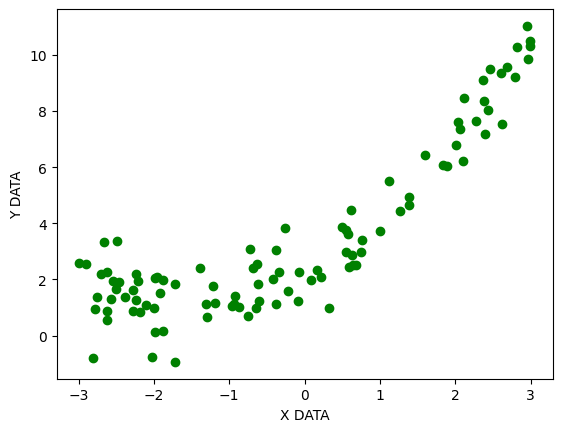

In [3]:
X=6*np.random.rand(100,1)-3
Y=0.5*X**2+1.5*X+2+np.random.randn(100,1)
plt.scatter(X,Y,color='g')
plt.xlabel('X DATA')
plt.ylabel('Y DATA')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train_poly,Y_train)
y_pred=regression.predict(X_test_poly)
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score)

0.8798376066410358


In [8]:
regression.coef_

array([[0.        , 1.39486387, 0.47166159]])

In [9]:
regression.intercept_

array([2.2226267])

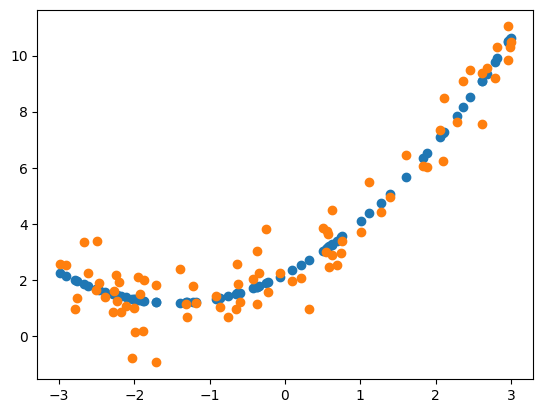

In [11]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,Y_train)

PIPELINE 

In [13]:
from sklearn.pipeline import Pipeline

In [29]:
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)
    poly_feat=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([("poly_feat",poly_feat),("lin_reg",lin_reg)])
    poly_regression.fit(X_train,Y_train)
    y_pred_new=poly_regression.predict(X_new)
    plt.plot(X_new,y_pred_new,'r',label="Degree"+str(degree),linewidth=3)
    plt.scatter(X_train,Y_train,color="b",linewidth=3,label="Training Points")
    plt.scatter(X_test,Y_test,color="g",linewidth=3,label="Testing Points")
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4,4,0,10])
    plt.show()


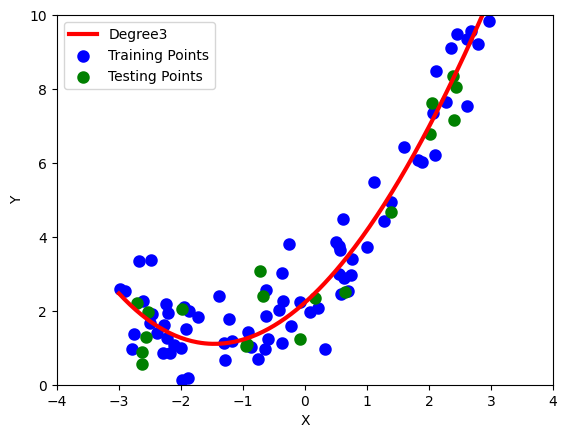

In [39]:
poly_regression(3)